数据集：https://pan.baidu.com/s/1bQcQAz0pxPix9q9kCoZ1aw 6gpd

# task1:创建VGG16

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D


def generate_vgg16():
    """
    搭建VGG16网络结构
    :return: VGG16网络
    """
    input_shape = (224, 224, 3)
    model = Sequential([
        Conv2D(64, (3, 3), input_shape=input_shape, padding='same', activation='relu'),
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2,2), strides=(2,2)),
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2,2), strides=(2,2)),
        Conv2D(256, (3, 3), padding='same', activation='relu'),
        Conv2D(256, (3, 3), padding='same', activation='relu'),
        Conv2D(256, (3, 3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2,2), strides=(2,2)),
        Conv2D(512, (3, 3), padding='same', activation='relu'),
        Conv2D(512, (3, 3), padding='same', activation='relu'),
        Conv2D(512, (3, 3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2,2), strides=(2,2)),
        Conv2D(512, (3, 3), padding='same', activation='relu'),
        Conv2D(512, (3, 3), padding='same', activation='relu'),
        Conv2D(512, (3, 3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2,2), strides=(2,2)),
        Flatten(),
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dense(1000, activation='softmax')
    ])

    return model

if __name__ == '__main__':
    model = generate_vgg16()
    model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 256)      

# task2:将flicker8k的图像文件转为图像特征，保存为字典pickle文件

In [4]:
from keras.models import model_from_json
from PIL import Image as pil_image
from keras import backend as K
import numpy as np
from pickle import dump
from os import listdir
from keras.models import Model
import keras
import pickle

def load_vgg16_model():
    """从当前目录下面的 vgg16_exported.json 和 vgg16_exported.h5 两个文件中导入 VGG16 网络并返回创建的网络模型
    # Returns
        创建的网络模型 model
        
        
    ***example
    from keras.models import model_from_json
    json_file = open('vgg16_exported.json','r')
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    model.load_weight('vgg16_exported.h5')
    ***
    """
    json_file = open('vgg16_exported.json','r')
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    model.load_weights('vgg16_exported.h5')
    return model


def preprocess_input(x):
    """预处理图像用于网络输入, 将图像由RGB格式转为BGR格式.
       将图像的每一个图像通道减去其均值

    # Arguments
        x: numpy 数组, 4维.
        data_format: Data format of the image array.

    # Returns
        Preprocessed Numpy array.
    """
    x = x[...,::-1]
    mean = [103.939,116.779,123.68]
    x[...,0] -= mean[0]
    x[...,1] -= mean[1]
    x[...,2] -= mean[2]
    return x 

def load_img_as_np_array(path, target_size):
    """从给定文件加载图像,转换图像大小为给定target_size,返回32位浮点数numpy数组.
    
    ***example:
    from PIL import Image as pil_image
    img = pil_image.open(filepath)
    img.resize(target_size,pil_image.NEAREST)
    result = np.asarray(img,dtype=K.floatx())
    ***
    
    # Arguments
        path: 图像文件路径
        target_size: 元组(图像高度, 图像宽度).

    # Returns
        A PIL Image instance.
    """
    img = pil_image.open(path)
    if img.mode !='RGB':
        img = img.convert('RGB')
    img = img.resize(target_size,pil_image.NEAREST)
    x = np.asarray(img,dtype=K.floatx())
    return x

def extract_features(directory):
    """提取给定文件夹中所有图像的特征, 将提取的特征保存在文件features.pkl中,
       提取的特征保存在一个dict中, key为文件名(不带.jpg后缀), value为特征值[np.array]
    ***example
    model = load_vgg16_model()
    model.layers.pop()
    model = Model(inputs=model.inputs,outputs=model.layers[-1].output)??
    model.summary()
    features = dict()
    for index,fn in enumerate(listdir(directory)):
        fn = firectory + '/' + fn
        arr = load_img_as_np_array(fn,target_size=(224,224))
        arr = arr.reshape((1,arr.shape[0],arr.shape[1],arr.shape[2]))
        arr = perprocess_input(arr)
        feature = model.predict(arr,verbose=0)
        id = fn.split(".")[0].split('/')[-1]
        features[id] = feature
    ***
    Args:
        directory: 包含jpg文件的文件夹

    Returns:
        None
    """
    model = load_vgg16_model()
    model.layers.pop()
    model = Model(inputs=model.inputs,outputs=model.layers[-1].output)
    model.summary()
    features = dict()
    for index,fn in enumerate(listdir(directory)):
        fn = directory + '/' + fn
        arr = load_img_as_np_array(fn,target_size=(224,224))
        arr = arr.reshape((1,arr.shape[0],arr.shape[1],arr.shape[2]))
        arr = preprocess_input(arr)
        feature = model.predict(arr,verbose=0)
        id = fn.split(".")[0].split('/')[-1]
        features[id] = feature
        print('{}:{}'.format(index,fn))
    file = open('features.pkl','wb')
    pickle.dump(features,file)
    file.close()
    return features
if __name__ == '__main__':
    # 提取所有图像的特征，保存在一个文件中, 大约一小时的时间，最后的文件大小为127M
    directory = 'Flicker8k_Dataset'
    #features = extract_features(directory) #第一次训练去掉注释，注释下面一行
    fr = open("features.pkl", "rb")
    features= pickle.load(fr)
    print('提取特征的文件个数：%d' % len(features))
    print(keras.backend.image_data_format())
    

提取特征的文件个数：8091
channels_last


# task3

## 如何使用tokenizer

In [5]:
from keras.preprocessing.text import Tokenizer
tikenizer = Tokenizer()
lines = ['this is good','that is a cat']
tikenizer.fit_on_texts(lines)
results = tikenizer.texts_to_sequences(['cat is good'])
results[0]

[6, 1, 3]

In [6]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
max_length = 6
vocab_size = 661
seq = [2,660,6,229,3]
i =1
in_seq,out_seq = seq[:i],seq[i]
in_seq = pad_sequences([in_seq],maxlen=max_length)[0]
out_seq = to_categorical([out_seq],num_classes=vocab_size)[0]
print(in_seq,out_seq)

[0 0 0 0 0 2] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from numpy import array
from pickle import load
import util

def ceate_tokenizer():
    #产生descriptions.txt
    train_image_names = util.load_set('Flickr_8k.trainImages.txt')
    train_descriptions = util.load_clean_captions('descriptions.txt',train_image_names)
    lines = util.to_lines(train_descriptions)
    pass


def create_sequences(tokenizer, max_length, descriptions, photos_features, vocab_size = 7378):
    """
    从输入的图片标题list和图片特征构造LSTM的一组输入

    Args:
    :param tokenizer: 英文单词和整数转换的工具keras.preprocessing.text.Tokenizer
    :param max_length: 训练数据集中最长的标题的长度
    :param descriptions: dict, key 为图像的名(不带.jpg后缀), value 为list, 包含一个图像的几个不同的描述
    :param photos_features:  dict, key 为图像的名(不带.jpg后缀), value 为numpy array 图像的特征
    :param vocab_size: 训练集中表的单词数量
    :return: tuple:
            第一个元素为 numpy array, 元素为图像的特征, 它本身也是 numpy.array
            第二个元素为 numpy array, 元素为图像标题的前缀, 它自身也是 numpy.array
            第三个元素为 numpy array, 元素为图像标题的下一个单词(根据图像特征和标题的前缀产生) 也为numpy.array

    Examples:
        from pickle import load
        tokenizer = load(open('tokenizer.pkl', 'rb'))
        max_length = 6
        descriptions = {'1235345':['startseq one bird on tree endseq', "startseq red bird on tree endseq"],
                        '1234546':['startseq one boy play water endseq', "startseq one boy run across water endseq"]}
        photo_features = {'1235345':[ 0.434,  0.534,  0.212,  0.98 ],
                          '1234546':[ 0.534,  0.634,  0.712,  0.28 ]}
        vocab_size = 7378
        print(create_sequences(tokenizer, max_length, descriptions, photo_features, vocab_size))
(array([[ 0.434,  0.534,  0.212,  0.98 ],
       [ 0.434,  0.534,  0.212,  0.98 ],
       [ 0.434,  0.534,  0.212,  0.98 ],
       [ 0.434,  0.534,  0.212,  0.98 ],
       [ 0.434,  0.534,  0.212,  0.98 ],
       [ 0.434,  0.534,  0.212,  0.98 ],
       [ 0.434,  0.534,  0.212,  0.98 ],
       [ 0.434,  0.534,  0.212,  0.98 ],
       [ 0.434,  0.534,  0.212,  0.98 ],
       [ 0.434,  0.534,  0.212,  0.98 ],
       [ 0.534,  0.634,  0.712,  0.28 ],
       [ 0.534,  0.634,  0.712,  0.28 ],
       [ 0.534,  0.634,  0.712,  0.28 ],
       [ 0.534,  0.634,  0.712,  0.28 ],
       [ 0.534,  0.634,  0.712,  0.28 ],
       [ 0.534,  0.634,  0.712,  0.28 ],
       [ 0.534,  0.634,  0.712,  0.28 ],
       [ 0.534,  0.634,  0.712,  0.28 ],
       [ 0.534,  0.634,  0.712,  0.28 ],
       [ 0.534,  0.634,  0.712,  0.28 ],
       [ 0.534,  0.634,  0.712,  0.28 ]]),
array([[  0,   0,   0,   0,   0,   2],
       [  0,   0,   0,   0,   2,  59],
       [  0,   0,   0,   2,  59, 254],
       [  0,   0,   2,  59, 254,   6],
       [  0,   2,  59, 254,   6, 134],
       [  0,   0,   0,   0,   0,   2],
       [  0,   0,   0,   0,   2,  26],
       [  0,   0,   0,   2,  26, 254],
       [  0,   0,   2,  26, 254,   6],
       [  0,   2,  26, 254,   6, 134],
       [  0,   0,   0,   0,   0,   2],
       [  0,   0,   0,   0,   2,  59],
       [  0,   0,   0,   2,  59,  16],
       [  0,   0,   2,  59,  16,  82],
       [  0,   2,  59,  16,  82,  24],
       [  0,   0,   0,   0,   0,   2],
       [  0,   0,   0,   0,   2,  59],
       [  0,   0,   0,   2,  59,  16],
       [  0,   0,   2,  59,  16, 165],
       [  0,   2,  59,  16, 165, 127],
       [  2,  59,  16, 165, 127,  24]]),
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]]))
    """
    X1, X2, y = list(), list(), list()
    for key, desc_list in descriptions.items():
        for desc in desc_list:
            seq = tokenizer.texts_to_sequences([desc])[0]
            for i in range(1, len(seq)):
                in_seq, out_seq = seq[:i], seq[i]
                #填充in_seq,使得其长度为max_length
                in_seq = pad_sequences([in_seq], maxlen = max_length)[0]
                out_seq = to_categorical([out_seq], num_classes = vocab_size)[0]
                X1.append(photos_features[key][0])
                X2.append(in_seq)
                y.append(out_seq)
    return array(X1), array(X2), array(y)

# task4:构建自动产生图像标题的网络结构

## 模型结构

In [ ]:
'''
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
input1 = Input(shape=(4096,))
dropout_1 = Dropout(0.5)(input1)
dense_1 = Dense(256,activation='relu')(dropout_1)

input2 = Input(shape=(max_len,))
embed_1 =Embedding(vocab_size,256)(input2)
lstm_1 = LSTM(256,activation='relu')(embed_1)

add_1 = add([dense_1,lstm_1])
dense_2 = Dense(256,activation='relu')(add_1)
outputs = Dense(vocab_size,activation='softmax')(dense_2)
model = Model(inputs=[input1,input2],outputs=outputs)
model.compile(loss='categorical_crossentropy',optimizer='adam')
'''

In [30]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from pickle import load
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
import util
from numpy import array
from keras import callbacks

def create_batches(desc_list, photo_features, tokenizer, max_len, vocab_size=7378):
    """从输入的图片标题list和图片特征构造LSTM的一组输入

    Args:
        desc_list: 某一个图像对应的一组标题(一个list)
        photo_features: 某一个图像对应的特征
        tokenizer: 英文单词和整数转换的工具keras.preprocessing.text.Tokenizer
        max_len: 训练数据集中最长的标题的长度
        vocab_size: 训练集中的单词个数, 默认为7378

    Returns:
        tuple:
            第一个元素为list, list的元素为图像的特征
            第二个元素为list, list的元素为图像标题的前缀
            第三个元素为list, list的元素为图像标题的下一个单词(根据图像特征和标题的前缀产生)

    Examples:
        #>>> from pickle import load
        #>>> tokenizer = load(open('tokenizer.pkl', 'rb'))
        #>>> desc_list = ['startseq one dog on desk endseq', "startseq red bird on tree endseq"]
        #>>> photo_features = [0.434, 0.534, 0.212, 0.98]
        #>>> print(create_batches(desc_list, photo_features, tokenizer, 6, 7378))
            (array([[ 0.434,  0.534,  0.212,  0.98 ],
                   [ 0.434,  0.534,  0.212,  0.98 ],
                   [ 0.434,  0.534,  0.212,  0.98 ],
                   [ 0.434,  0.534,  0.212,  0.98 ],
                   [ 0.434,  0.534,  0.212,  0.98 ],
                   [ 0.434,  0.534,  0.212,  0.98 ],
                   [ 0.434,  0.534,  0.212,  0.98 ],
                   [ 0.434,  0.534,  0.212,  0.98 ],
                   [ 0.434,  0.534,  0.212,  0.98 ],
                   [ 0.434,  0.534,  0.212,  0.98 ]]),
            array([[   0,    0,    0,    0,    0,    2],
                   [   0,    0,    0,    0,    2,   59],
                   [   0,    0,    0,    2,   59,    9],
                   [   0,    0,    2,   59,    9,    6],
                   [   0,    2,   59,    9,    6, 1545],
                   [   0,    0,    0,    0,    0,    2],
                   [   0,    0,    0,    0,    2,   26],
                   [   0,    0,    0,    2,   26,  254],
                   [   0,    0,    2,   26,  254,    6],
                   [   0,    2,   26,  254,    6,  134]]),
            array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
                   [ 0.,  0.,  0., ...,  0.,  0.,  0.],
                   [ 0.,  0.,  0., ...,  0.,  0.,  0.],
                   ...,
                   [ 0.,  0.,  0., ...,  0.,  0.,  0.],
                   [ 0.,  0.,  0., ...,  0.,  0.,  0.],
                   [ 0.,  0.,  0., ...,  0.,  0.,  0.]]))

    """
    X1, X2, y = list(), list(), list()
    # walk through each description for the image
    for desc in desc_list:
        # encode the sequence
        seq = tokenizer.texts_to_sequences([desc])[0]
        # split one sequence into multiple X,y pairs
        for i in range(1, len(seq)):
            # split into input and output pair
            in_seq, out_seq = seq[:i], seq[i]
            # pad input sequence
            in_seq = pad_sequences([in_seq], maxlen=max_len)[0]
            # encode output sequence
            out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
            # store
            X1.append(photo_features)
            X2.append(in_seq)
            y.append(out_seq)
    return array(X1), array(X2), array(y)


# data generator, intended to be used in a call to model.fit_generator()
def data_generator(captions, photo_features, tokenizer, max_len):
    """创建一个训练数据生成器, 用于传入模型训练函数的第一个参数model.fit_generator(generator,...)

    Args:
        captions: dict, key为图像名(不包含.jpg后缀), value为list, 图像的几个训练标题
        photo_features: dict, key为图像名(不包含.jpg后缀), value为图像的特征
        tokenizer: 英文单词和整数转换的工具keras.preprocessing.text.Tokenizer
        max_len: 训练集中的标题最长长度

    Returns:
        generator, 使用yield [[list, 元素为图像特征, list, 元素为输入的图像标题前缀], list, 元素为预期的输出图像标题的下一个单词]

    """
    # loop for ever over images
    while 1:
        for key, desc_list in captions.items():
            # retrieve the photo feature
            photo_feature = photo_features[key][0]
            in_img, in_seq, out_word = create_batches(desc_list, photo_feature, tokenizer, max_len)
            yield [[in_img, in_seq], out_word]


def caption_model(vocab_size, max_len):
    """创建一个新的用于给图片生成标题的网络模型

    Args:
        vocab_size: 训练集中标题单词个数
        max_len: 训练集中的标题最长长度

    Returns:
        用于给图像生成标题的网络模型

    """
    input1 = Input(shape=(4096,))
    dropout_1 = Dropout(0.5)(input1)
    dense_1 = Dense(256,activation='relu')(dropout_1)

    input2 = Input(shape=(max_len,))
    embed_1 =Embedding(vocab_size,256)(input2)
    lstm_1 = LSTM(256,activation='relu')(embed_1)

    add_1 = add([dense_1,lstm_1])
    dense_2 = Dense(256,activation='relu')(add_1)
    outputs = Dense(vocab_size,activation='softmax')(dense_2)
    model = Model(inputs=[input1,input2],outputs=outputs)
    model.compile(loss='categorical_crossentropy',optimizer='adam')
    model.summary()
    return model

def train():
    # load training dataset (6K)
    filename = 'Flickr_8k.trainImages.txt'
    train = util.load_ids(filename)
    print('Dataset: %d' % len(train))
    train_captions = util.load_clean_captions('descriptions.txt', train)
    print('Captions: train number=%d' % len(train_captions))
    # photo features
    train_features = util.load_photo_features('features.pkl', train)
    print('Photos: train=%d' % len(train_features))
    # prepare tokenizer
    tokenizer = load(open('tokenizer.pkl', 'rb'))
    vocab_size = len(tokenizer.word_index) + 1
    print('Vocabulary Size: %d' % vocab_size)
    # determine the maximum sequence length
    max_len = util.get_max_length(train_captions)
    print('Description Length: %d' % max_len)

    # define the model
    model = caption_model(vocab_size, max_len)
    # train the model, run epochs manually and save after each epoch
    epochs = 20
    steps = len(train_captions)
    
    save_best = callbacks.ModelCheckpoint('11_best.h5',monitor='loss',verbose=1,save_best_only=True,mode='min')
    early_stop = callbacks.EarlyStopping(monitor='loss',min_delta=0,patience=15,verbose=0,mode='auto')
    callbacks_list = [early_stop,save_best]
    for i in range(epochs):
        # create the data generator
        generator = data_generator(train_captions, train_features, tokenizer, max_len)
        # fit for one epoch
        history = model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1,callbacks=callbacks_list)
        # save model
        model.save('model_' + str(i) + '.h5')
if __name__ == '__main__':
    train()

Dataset: 6000
Captions: train number=6000
Photos: train=6000
Vocabulary Size: 7378
Description Length: 40
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 4096)         0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 40)           0                                            
__________________________________________________________________________________________________
dropout_3 (Dropout)             (None, 4096)         0           input_5[0][0]                    
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 40, 256)      1888768     input_6[0][0]       

# task5:完成预测generate_caption代码，了解如何评价模型的性能

In [ ]:

'''
from keras.preprocessing.sequence import pad_sequences
import numpy as np
in_text = 'startseq'
for i in range(max_length):
    sequence = tokenizer.texts_to_sequences([in_text])
    sequence = pad_sequences(sequence,maxlen=max_length)
    output = model.predict([photo_feature,sequence])
    integer = np.argmax(output)
    word = word_for_id(integer,tokennizer)
    in_text = in_text + ' ' + word
    if word is None:
        break
    if word == 'endseq':
        break
'''

3745451546_fc8ec70cbd
Photos:test=1000
Flicker8k_Dataset/3745451546_fc8ec70cbd.jpg


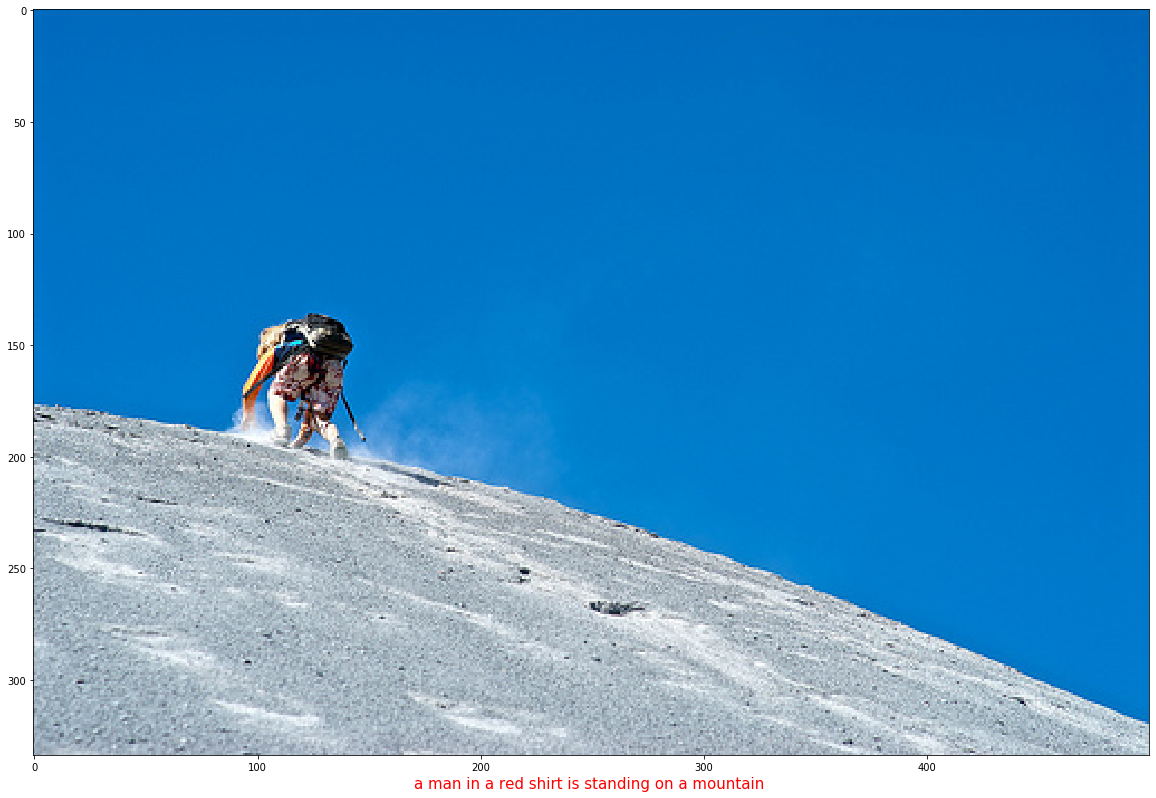

startseq a man in a red shirt is standing on a mountain endseq
result is:startseq a man in a red shirt is standing on a mountain endseq


In [36]:
import util
import numpy as np
from pickle import load
from nltk.translate.bleu_score import corpus_bleu
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
from PIL import Image
import matplotlib.pyplot as plt
def word_for_id(integer, tokenizer):
    """
    将一个整数转换为英文单词
    :param integer: 一个代表英文的整数
    :param tokenizer: 一个预先产生的keras.preprocessing.text.Tokenizer
    :return: 输入整数对应的英文单词
    """
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None


def generate_caption(model, tokenizer, photo_feature, max_length=40):
    """
    根据输入的图像特征产生图像的标题
    :param model: 预先训练好的图像标题生成神经网络模型
    :param tokenizer: 一个预先产生的keras.preprocessing.text.Tokenizer
    :param photo_feature:输入的图像特征, 为VGG16网络修改版产生的特征
    :param max_length: 训练数据中最长的图像标题的长度
    :return: 产生的图像的标题
    """
    in_text = 'startseq'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])
        sequence = pad_sequences(sequence,maxlen=max_length)
        output = model.predict([photo_feature,sequence])
        integer = np.argmax(output)
        word = word_for_id(integer,tokenizer)
        #print(word)
        if word is None:
            break
        in_text = in_text + ' ' + word
        if word == 'endseq':
            break
    return in_text


def evaluate_model(model, captions, photo_features, tokenizer, max_length=40):
    """计算训练好的神经网络产生的标题的质量,根据4个BLEU分数来评估

    Args:
        model:　训练好的产生标题的神经网络
        captions: dict, 测试数据集, key为文件名(不带.jpg后缀), value为图像标题list
        photo_features: dict, key为文件名(不带.jpg后缀), value为图像特征
        tokenizer: 英文单词和整数转换的工具keras.preprocessing.text.Tokenizer
        max_length：训练集中的标题的最大长度

    Returns:
        tuple:
            第一个元素为权重为(1.0, 0, 0, 0)的ＢＬＥＵ分数
            第二个元素为权重为(0.5, 0.5, 0, 0)的ＢＬＥＵ分数
            第三个元素为权重为(0.3, 0.3, 0.3, 0)的ＢＬＥＵ分数
            第四个元素为权重为(0.25, 0.25, 0.25, 0.25)的ＢＬＥＵ分数

    ***
    from nltk.tranlate.bleu_score import corpus_bleu
    r = [['there','is','a','dog']]
    c = [['there','is','a','pig']]
    score = corpus_bleu(r,c,weights=(1,0,0,0))
    ***
    """
    actual, predicted = list(), list()
    for key, caption_list in captions.items():
        yhat = generate_caption(
            model, tokenizer, phtoto_features[key], max_length)
        references = [d.split() for d in caption_list]
        actual.append(references)
        predicted.append(yhat.split())

    b1 = corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0))
    b2 = corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0))
    b3 = corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0))
    b4 = corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25))
    return b1, b2, b3, b4



def generate_caption_run(imag_path):
    filename = 'Flickr_8k.testImages.txt'
    test = util.load_ids(filename)
    test_features = util.load_photo_features('features.pkl',test)
    print('Photos:test=%d' %len(test_features))
    filename='11_best.h5'
    model =load_model(filename)
    tokenizer = load(open('tokenizer.pkl','rb'))
    caption = generate_caption(model,tokenizer,test_features[imag_path],40)
    str1 = "Flicker8k_Dataset/"+imag_path + '.jpg'
    print(str1)
    img = Image.open(str1)
    plt.figure(figsize=(20,20))
    plt.imshow(img)
    plt.xlabel(caption[9:][:-6],fontsize=15,color='red')
    plt.show()
    print(caption)
    return caption
'''
def evaluate_model_run():
    filename = 'Flickr_8k.testImages.txt'
    test = utils.load_ids(filename)
    test_captions = util.load_clean_captions('decriptions.txt',test)
    test_features = util.load_photo_features('features.pkl',test)
    
    filename='model_1.h5'
    model =load_model(filename)
    tokenizer = load(open('tokenizer.pkl','rb'))
    return evaluate_model(model, test_captions, test_features, tokenizer, max_length=40)
'''
if __name__ == '__main__':
    imag_path = '3745451546_fc8ec70cbd.jpg'
    imag_path = imag_path[:-4]
    print(imag_path)
    result = generate_caption_run(imag_path)
    print('result is:' + str(result))

